<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/Sepuluh/Airline_Delay_and_Cancellation_Data_2017_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Delay and Cancellation Data 2017 - 2018**

<br>
<table border="solid">
  <tr>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <td width=80%>FARAH IRDINA BINTI AHMAD BAHARUDIN</td>
    <td>A20EC0035</td>
  </tr>
  <tr>
    <td width=80%>LOW JUNYI</td>
    <td>A20EC0071</td>
  </tr>
  <tr>
    <td width=80%>NURFARRAHIN BINTI CHE ALIAS</td>
    <td>A20EC0121</td>
  </tr>
  <tr>
    <td width=80%>YONG ZHI YAN</td>
    <td>A20EC0172</td>
  </tr>
</table>
<br>


The "Airline Delay and Cancellation Data 2017-2018" dataset on Kaggle is a comprehensive collection of information on airline performance for the years 2017-2018. The dataset includes data on flight delays, cancellations, and various other performance metrics for a large number of airlines. The data includes information on the carrier, flight number, departure and arrival airports, departure and arrival times, and delay and cancellation information.

In this project, there are few objectives that we would like to achieve, such as:

1.   Comparing the time completion between three libraries
2.   Performing analysis and visualizations
3.   Asking and answering five possible questions



#**Downloading Dataset**

##Import libraries

Since this dataset is large with the size of 1.5GB, thus we need to use some powerful libraries to process this dataset. The libraries that we will be using are **pyspark**, **polars** and **library 3**. 


**PySpark** is an open-source library that provides an interface for programming Spark using the Python programming language. It is a powerful tool for big data processing and analytics that allows data scientists, engineers and developers to easily and efficiently process large datasets. PySpark is built on top of the Apache Spark framework, which is known for its ability to handle large-scale data processing and its ability to perform real-time processing and analytics.

**Polars** is a Python library for creating interactive plots and charts using the Plotly library. It is built on top of Plotly, which means that it inherits the functionality and features of Plotly, but provides a simpler and more convenient API for creating plots and charts. Polars is particularly useful for creating polar plots and radar charts, which are not natively supported by Plotly. With Polars, we can easily create interactive plots and charts with a few lines of code, and customize them with a wide range of options.

###Library 1: Pyspark

In [ ]:
%%time

!pip install pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

from pyspark.sql.functions import col, isnan, when, count

spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e6c8d3078eb75e9ebbdf5ca15b7e488029dc97e7a2620206adefd7487c94e61e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
CPU times: user 483 ms, sys: 80.2 ms, total: 563 ms
Wall time: 47.2 s


###Library 2: Polars

In [ ]:
%%time

!pip install polars
import polars as pl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 71.2 ms, sys: 26.5 ms, total: 97.7 ms
Wall time: 4.29 s


###Library 3: 

##Import dataset

Importing a dataset is the process of bringing data into a program or software for analysis or processing. This process is a crucial step for data-driven projects as it enables the use of various data analysis and visualization techniques. We have downloaded the dataset and upload it in google drive and below is the command to download the dataset into our file.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/15DPFCKEZMH2XdXfFMPH8r3uZn_aAE--H/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('airline1718.csv')

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df = spark.read.csv('airline1718.csv', header=True)
pyspark_df.show()

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|   FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|

###Library 2: Polars

In [ ]:
%%time

polars_df = pl.read_csv('airline1718.csv')
polars_df

CPU times: user 18.1 s, sys: 5.55 s, total: 23.7 s
Wall time: 12.7 s


FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
str,str,i64,str,str,i64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""2017-01-01""","""AA""",1,"""JFK""","""LAX""",800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,null,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,null
"""2017-01-01""","""AA""",2,"""LAX""","""JFK""",900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,null,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,null
"""2017-01-01""","""AA""",4,"""LAX""","""JFK""",1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,null,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,null
"""2017-01-01""","""AA""",5,"""DFW""","""HNL""",1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,null,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,null
"""2017-01-01""","""AA""",6,"""OGG""","""DFW""",1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,null,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,null
"""2017-01-01""","""AA""",7,"""DFW""","""OGG""",940,1619.0,399.0,12.0,1631.0,2031.0,6.0,1403,2037.0,394.0,0.0,null,0.0,503.0,498.0,480.0,3711.0,394.0,0.0,0.0,0.0,0.0,null
"""2017-01-01""","""AA""",8,"""HNL""","""DFW""",1838,1903.0,25.0,19.0,1922.0,636.0,12.0,550,648.0,58.0,0.0,null,0.0,432.0,465.0,434.0,3784.0,25.0,0.0,33.0,0.0,0.0,null
"""2017-01-01""","""AA""",9,"""JFK""","""SFO""",700,656.0,-4.0,22.0,718.0,1020.0,3.0,1045,1023.0,-22.0,0.0,null,0.0,405.0,387.0,362.0,2586.0,null,null,null,null,null,null
"""2017-01-01""","""AA""",10,"""LAX""","""JFK""",2100,2100.0,0.0,15.0,2115.0,447.0,10.0,527,457.0,-30.0,0.0,null,0.0,327.0,297.0,272.0,2475.0,null,null,null,null,null,null


###Library 3: 

#**Data Preparation and Cleaning**

##Correcting data types of each column

Correcting the data types of a dataset is an important step in the data cleaning and preprocessing process. Data types refer to the format or category in which a data value is stored, such as string, integers, or dates. Ensuring that the data types are correct allows for proper analysis and manipulation of the data. For example, if a column containing numerical values is stored as text, it will not be able to be used in mathematical calculations. By identifying and correcting any incorrect data types, we can ensure that our analysis is accurate and reliable.

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df.dtypes

CPU times: user 89 µs, sys: 0 ns, total: 89 µs
Wall time: 93 µs


[('FL_DATE', 'string'),
 ('OP_CARRIER', 'string'),
 ('OP_CARRIER_FL_NUM', 'string'),
 ('ORIGIN', 'string'),
 ('DEST', 'string'),
 ('CRS_DEP_TIME', 'string'),
 ('DEP_TIME', 'string'),
 ('DEP_DELAY', 'string'),
 ('TAXI_OUT', 'string'),
 ('WHEELS_OFF', 'string'),
 ('WHEELS_ON', 'string'),
 ('TAXI_IN', 'string'),
 ('CRS_ARR_TIME', 'string'),
 ('ARR_TIME', 'string'),
 ('ARR_DELAY', 'string'),
 ('CANCELLED', 'string'),
 ('DIVERTED', 'string'),
 ('CRS_ELAPSED_TIME', 'string'),
 ('ACTUAL_ELAPSED_TIME', 'string'),
 ('AIR_TIME', 'string'),
 ('DISTANCE', 'string')]

In [ ]:
%%time

from pyspark.sql.functions import to_date
from pyspark.sql.types import IntegerType

pyspark_df = pyspark_df.withColumn("FL_DATE", to_date(pyspark_df.FL_DATE))
pyspark_df = pyspark_df.withColumn("DEP_DELAY",pyspark_df["DEP_DELAY"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("TAXI_OUT",pyspark_df["TAXI_OUT"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("TAXI_IN",pyspark_df["TAXI_IN"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("ARR_DELAY",pyspark_df["ARR_DELAY"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("CRS_ELAPSED_TIME",pyspark_df["CRS_ELAPSED_TIME"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("ACTUAL_ELAPSED_TIME",pyspark_df["ACTUAL_ELAPSED_TIME"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("AIR_TIME",pyspark_df["AIR_TIME"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("DISTANCE",pyspark_df["DISTANCE"].cast(IntegerType()))


pyspark_df.dtypes

CPU times: user 27.3 ms, sys: 4 ms, total: 31.3 ms
Wall time: 372 ms


[('FL_DATE', 'date'),
 ('OP_CARRIER', 'string'),
 ('OP_CARRIER_FL_NUM', 'string'),
 ('ORIGIN', 'string'),
 ('DEST', 'string'),
 ('CRS_DEP_TIME', 'string'),
 ('DEP_TIME', 'string'),
 ('DEP_DELAY', 'int'),
 ('TAXI_OUT', 'int'),
 ('WHEELS_OFF', 'string'),
 ('WHEELS_ON', 'string'),
 ('TAXI_IN', 'int'),
 ('CRS_ARR_TIME', 'string'),
 ('ARR_TIME', 'string'),
 ('ARR_DELAY', 'int'),
 ('CANCELLED', 'string'),
 ('CANCELLATION_CODE', 'string'),
 ('DIVERTED', 'string'),
 ('CRS_ELAPSED_TIME', 'int'),
 ('ACTUAL_ELAPSED_TIME', 'int'),
 ('AIR_TIME', 'int'),
 ('DISTANCE', 'int'),
 ('CARRIER_DELAY', 'string'),
 ('WEATHER_DELAY', 'string'),
 ('NAS_DELAY', 'string'),
 ('SECURITY_DELAY', 'string'),
 ('LATE_AIRCRAFT_DELAY', 'string'),
 ('Unnamed: 27', 'string')]

###Library 2: Polars

##Calculating null values in each column

Calculating the number of null values in each column of a dataset is an important step in data cleaning and preprocessing. This process helps to identify missing or incomplete data, which can affect the accuracy and reliability of the analysis. The presence of null values can also indicate errors in the data collection or storage process. In many cases, null values must be handled or replaced before further analysis can be done.

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in pyspark_df.columns]).show()

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|      0| 

###Library 2: Polars

In [ ]:
%%time

polars_df.null_count()

CPU times: user 191 µs, sys: 53 µs, total: 244 µs
Wall time: 2.3 ms


FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,192625,197577,197975,197970,203920,203920,0,203919,232251,0,12688790,0,17,229653,229653,0,10505884,10505884,10505884,10505884,10505884,12888067


###Library 3: 

##Cleaning data

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in data. It is an essential step in the data preprocessing pipeline and to clean this dataset, we will be performing several sub-tasks, such as: 

1.   Delete unnecessary columns
2.   Delete duplications
3.   Delete missing values



###Library 1: Pyspark

In [ ]:
%%time

pyspark_df = pyspark_df.drop("CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27")
pyspark_df = pyspark_df.dropDuplicates()
pyspark_df = pyspark_df.na.drop()

CPU times: user 8.45 ms, sys: 1.22 ms, total: 9.67 ms
Wall time: 74.3 ms


In [ ]:
%%time

pyspark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|      0|         0|                0|     0|   0|           0|       0|        0|       0|         0|        0|      0|           0|       0|        0|        0|       0|               0|                  0|       0|       0|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+-

###Library 2: Polars

In [ ]:
%%time

polars_df = polars_df.drop(["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"])
polars_df = polars_df.unique()
polars_df = polars_df.drop_nulls()

In [ ]:
%%time

polars_df.null_count()

CPU times: user 74 µs, sys: 22 µs, total: 96 µs
Wall time: 100 µs


FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Library 3: 

#**Exploratory Analysis and Visualization**



*   Compute the mean, sum, range and other interesting statistics for numeric columns
*   Explore distributions of numeric columns using histograms etc.
*   Explore relationship between columns using scatter plots, bar charts etc.
*   Make a note of interesting insights from the exploratory analysis




##Data Description

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df.describe().show()

+-------+----------+----------+------------------+--------+--------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+---------+--------+-----------------+-------------------+------------------+-----------------+
|summary|   FL_DATE|OP_CARRIER| OP_CARRIER_FL_NUM|  ORIGIN|    DEST|      CRS_DEP_TIME|         DEP_TIME|         DEP_DELAY|         TAXI_OUT|        WHEELS_OFF|         WHEELS_ON|           TAXI_IN|     CRS_ARR_TIME|          ARR_TIME|        ARR_DELAY|CANCELLED|DIVERTED| CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|
+-------+----------+----------+------------------+--------+--------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+---------+--------+-----------------+-----------

###Library 2: Polars

In [ ]:
%%time

polars_df.describe()

CPU times: user 15.4 s, sys: 2.22 s, total: 17.6 s
Wall time: 9.29 s


describe,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
str,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""12651227""","""12651227""",1.2651227e7,"""12651227""","""12651227""",1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,2395.460399,null,null,1328.879747,1333.644013,9.795301,17.121767,1356.836609,1463.169223,7.554719,1486.788055,1467.681218,4.734052,0.0,0.0,143.899306,138.838216,114.16173,826.935348
"""std""",null,null,1819.508569,null,null,490.76942,504.480672,44.206498,9.670517,506.114697,533.434867,5.980144,518.426004,537.708415,46.46997,0.0,0.0,75.212918,74.771383,72.595168,611.536508
"""min""","""2017-01-01""","""9E""",1.0,"""ABE""","""ABE""",1.0,1.0,-234.0,0.0,1.0,1.0,0.0,1.0,1.0,-238.0,0.0,0.0,-99.0,14.0,7.0,31.0
"""max""","""2018-12-31""","""YX""",8402.0,"""YUM""","""YUM""",2359.0,2400.0,2710.0,196.0,2400.0,2400.0,414.0,2400.0,2400.0,2692.0,0.0,0.0,718.0,784.0,712.0,4983.0
"""median""",null,null,1893.0,null,null,1320.0,1327.0,-2.0,15.0,1340.0,1504.0,6.0,1515.0,1507.0,-6.0,0.0,0.0,125.0,120.0,95.0,651.0


##Distributions of the first 1,000,000 columns using Kernel Density Estimate (KDE)

###Library 1: Pyspark

In [ ]:
%%time

pyspark_histogram = pyspark_df.limit(1000000)
pyspark_histogram = pyspark_histogram.toPandas()

CPU times: user 26.5 s, sys: 2.31 s, total: 28.8 s
Wall time: 3min 32s


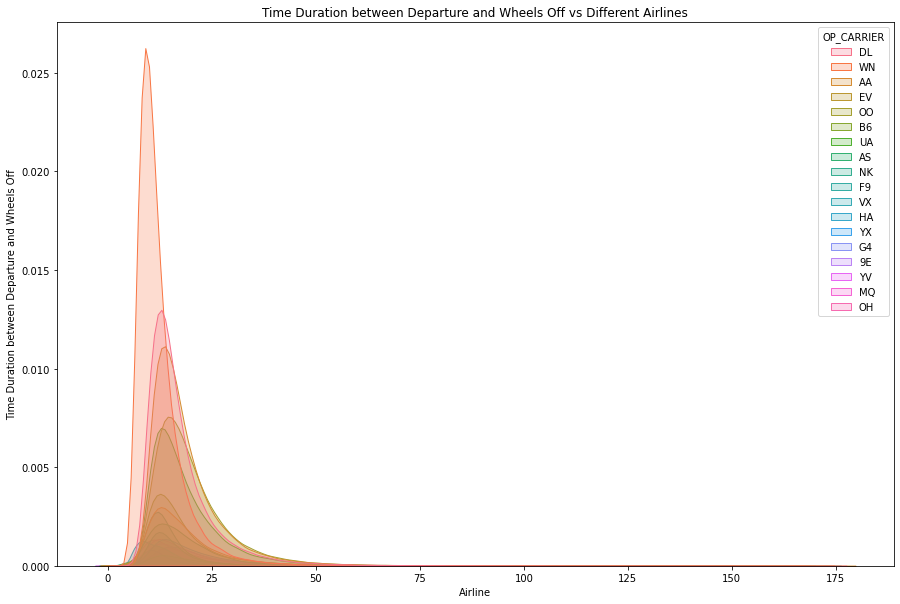

CPU times: user 9.6 s, sys: 5.34 s, total: 14.9 s
Wall time: 9.01 s


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Time Duration between Departure and Wheels Off vs Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Time Duration between Departure and Wheels Off')
sns.kdeplot(data=pyspark_histogram, x='TAXI_OUT', hue='OP_CARRIER', shade=True)
plt.show()

###Library 2: Polars

In [ ]:
polars_histogram = polars_df.head(1000000)

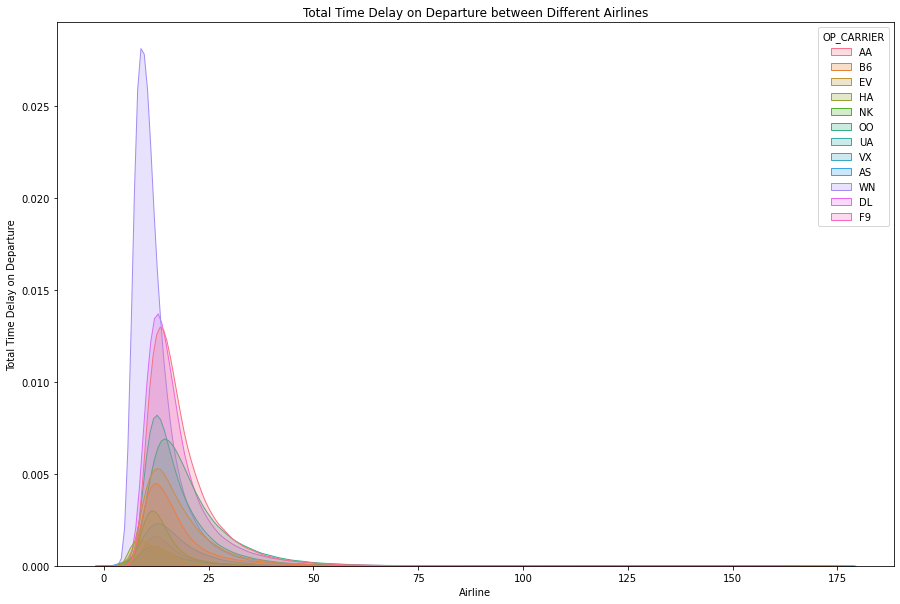

CPU times: user 6.54 s, sys: 3.89 s, total: 10.4 s
Wall time: 6.07 s


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Time Duration between Departure and Wheels Off vs Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Time Duration between Departure and Wheels Off')
sns.kdeplot(data=polars_histogram, x='TAXI_OUT', hue='OP_CARRIER', shade=True)
plt.show()

##Relationship between Airline and Total Time Delay using Different Charts

###Bar Chart

####Library 1: Pyspark

In [ ]:
%%time

pyspark_chart1 = pyspark_df.groupby("OP_CARRIER").sum("DEP_DELAY")
pyspark_chart1 = pyspark_chart1.sort(col("OP_CARRIER").asc())
pyspark_chart1 = pyspark_chart1.toPandas()

CPU times: user 678 ms, sys: 109 ms, total: 787 ms
Wall time: 2min 11s


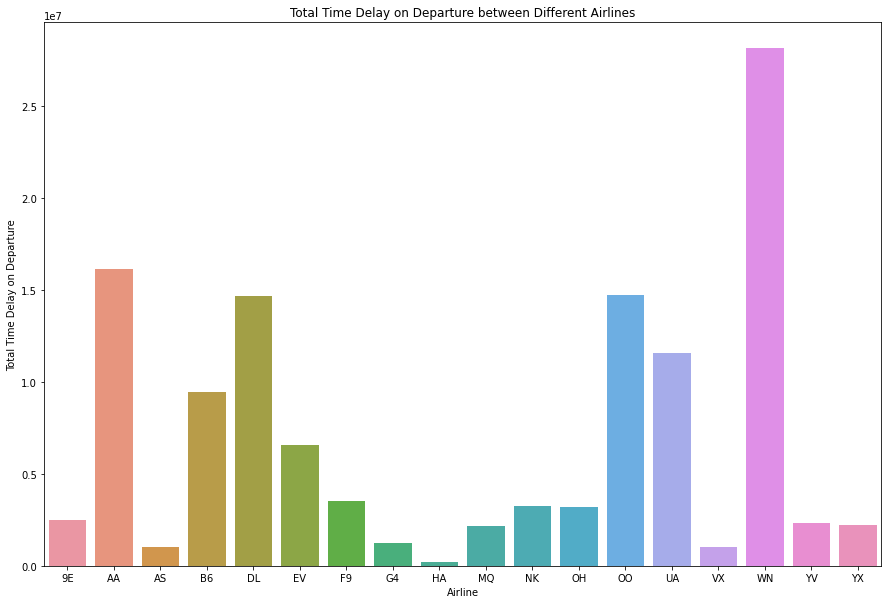

CPU times: user 263 ms, sys: 6.19 ms, total: 269 ms
Wall time: 281 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
sns.barplot(x=pyspark_chart1['OP_CARRIER'], y=pyspark_chart1['sum(DEP_DELAY)'])
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure')
plt.show()

####Library 2: Polars

In [ ]:
%%time

polars_chart1 = polars_df.groupby("OP_CARRIER").agg([(pl.col("DEP_DELAY")).sum()])
polars_chart1 = polars_chart1.sort(col("OP_CARRIER").asc())
polars_chart1 = polars_chart1.to_pandas()

CPU times: user 584 ms, sys: 92.9 ms, total: 677 ms
Wall time: 237 ms


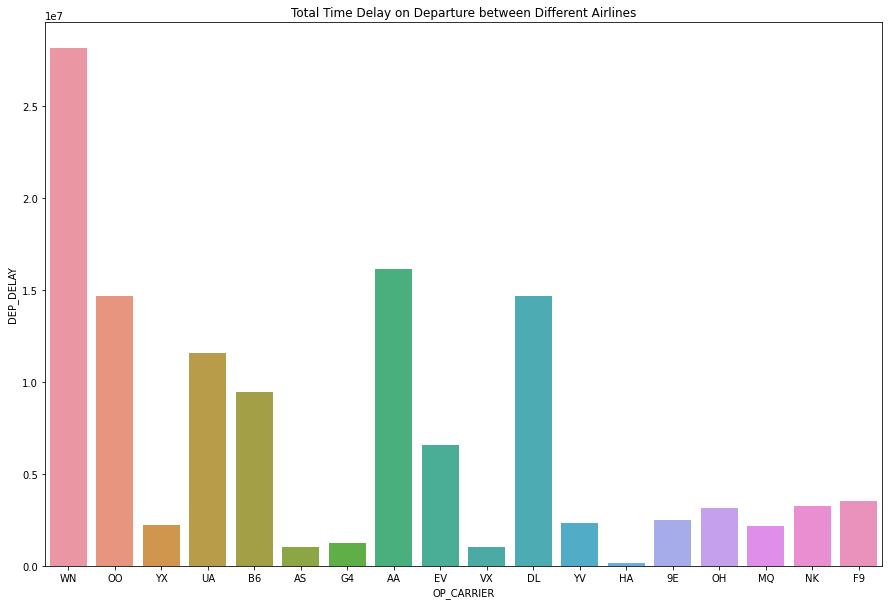

CPU times: user 251 ms, sys: 8.27 ms, total: 260 ms
Wall time: 275 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
sns.barplot(x=polars_chart1.OP_CARRIER, y=polars_chart1.DEP_DELAY)
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure')
plt.show()

###Line Chart

####Library 1: Pyspark

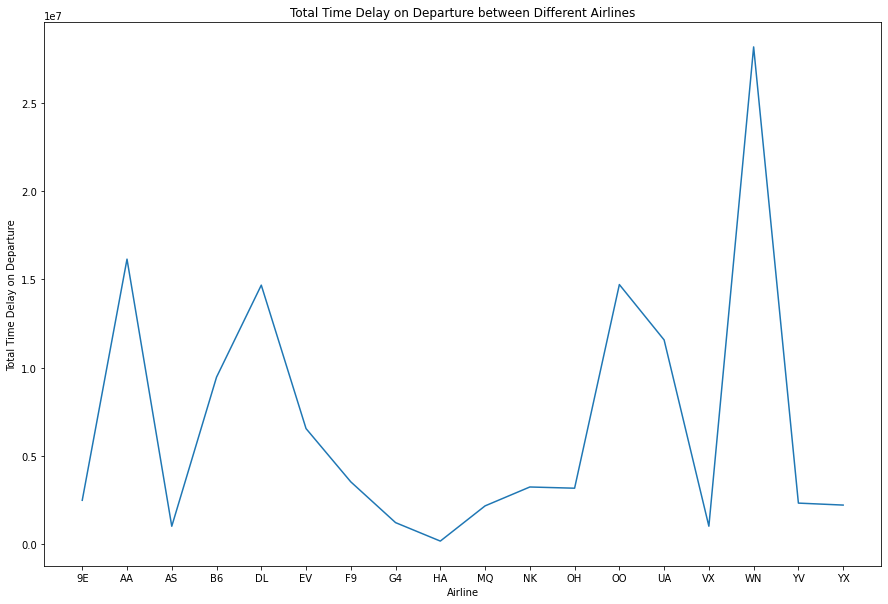

CPU times: user 258 ms, sys: 21.5 ms, total: 279 ms
Wall time: 278 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure')
sns.lineplot(x=pyspark_chart1['OP_CARRIER'], y=pyspark_chart1['sum(DEP_DELAY)'])
plt.show()

####Library 2: Polars

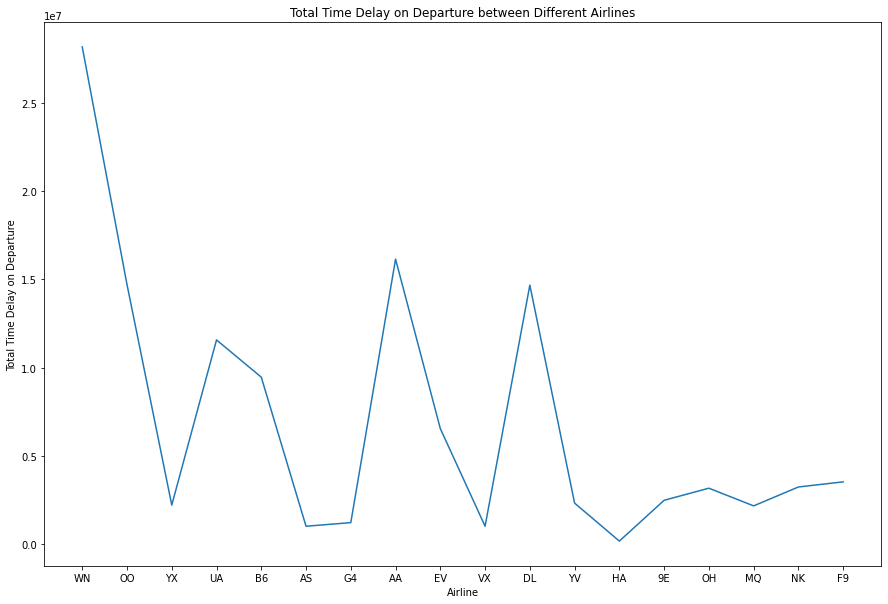

CPU times: user 247 ms, sys: 3.9 ms, total: 251 ms
Wall time: 249 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure')
sns.lineplot(x=polars_chart1.OP_CARRIER, y=polars_chart1.DEP_DELAY)
plt.show()

#**Asking and Answering Questions**


> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



##Question 1: What is the percentage of flights that were delayed?

###Library 1: Pyspark

In [ ]:
%%time

total_delayed_flights = pyspark_df.select('DEP_DELAY').where(pyspark_df.DEP_DELAY > 0).count()
total_flights = pyspark_df.select('DEP_DELAY').count()
pyspark_question1 = total_delayed_flights/total_flights * 100

print('Percentage of flights that were delayed is ', pyspark_question1, '%')

Percentage of flights that were delayed is  34.59924480052409
CPU times: user 990 ms, sys: 122 ms, total: 1.11 s
Wall time: 3min 19s


###Library 2: Polars

###Library 3: 

##Question 2: Which airport had the highest amount of flight time delayed?

###Library 1: Pyspark

In [ ]:
%%time

pyspark_question2 = pyspark_df.groupby("ORIGIN").sum("DEP_DELAY")
pyspark_question2 = pyspark_question2.sort(col("sum(DEP_DELAY)").desc())
pyspark_question2.head(1)

CPU times: user 634 ms, sys: 94.2 ms, total: 728 ms
Wall time: 2min 3s


[Row(ORIGIN='ATL', sum(DEP_DELAY)=7308866)]

###Library 2: Polars

###Library 3: 

##Question 3: Which month had the most number of flight delays?

###Library 1: Pyspark

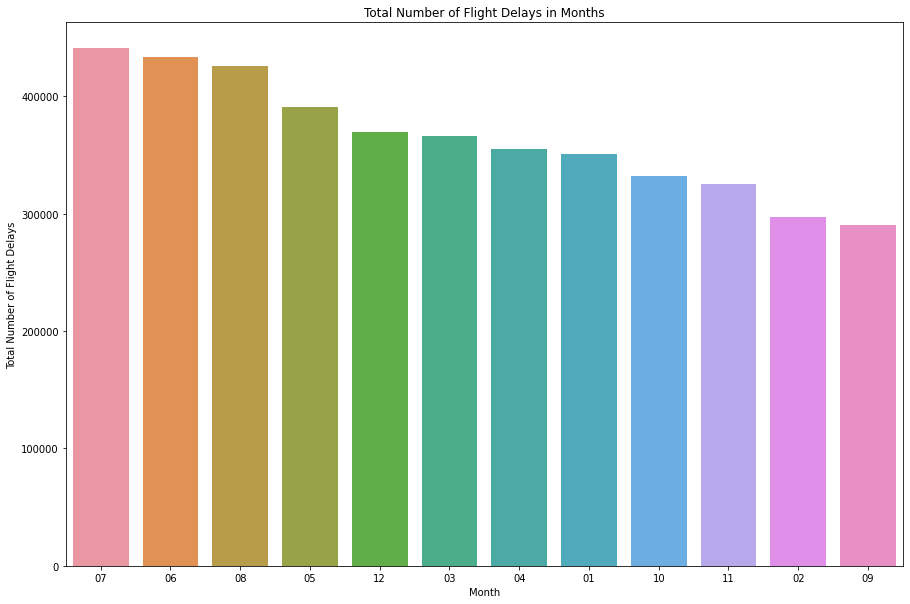

CPU times: user 630 ms, sys: 50.9 ms, total: 681 ms
Wall time: 1min 17s


In [ ]:
%%time

from pyspark.sql.functions import split

split_date = split(pyspark_df['FL_DATE'], '-')
pyspark_question3 = pyspark_df.withColumn('Month', split_date.getItem(1))
pyspark_question3 = pyspark_question3.where(pyspark_df.DEP_DELAY > 0)
pyspark_question3 = pyspark_question3.groupby("Month").count()
pyspark_question3 = pyspark_question3.sort(col("count").desc())
pyspark_question3 = pyspark_question3.toPandas()

plt.figure(figsize=(15,10))
plt.title("Total Number of Flight Delays in Months")
sns.barplot(x=pyspark_question3['Month'], y=pyspark_question3['count'])
plt.xlabel('Month')
plt.ylabel('Total Number of Flight Delays')
plt.show()

###Library 2: Polars

###Library 3: 

##Question 4: What is the relationship between time delay on departure and time delay on arrival?

###Library 1: Pyspark

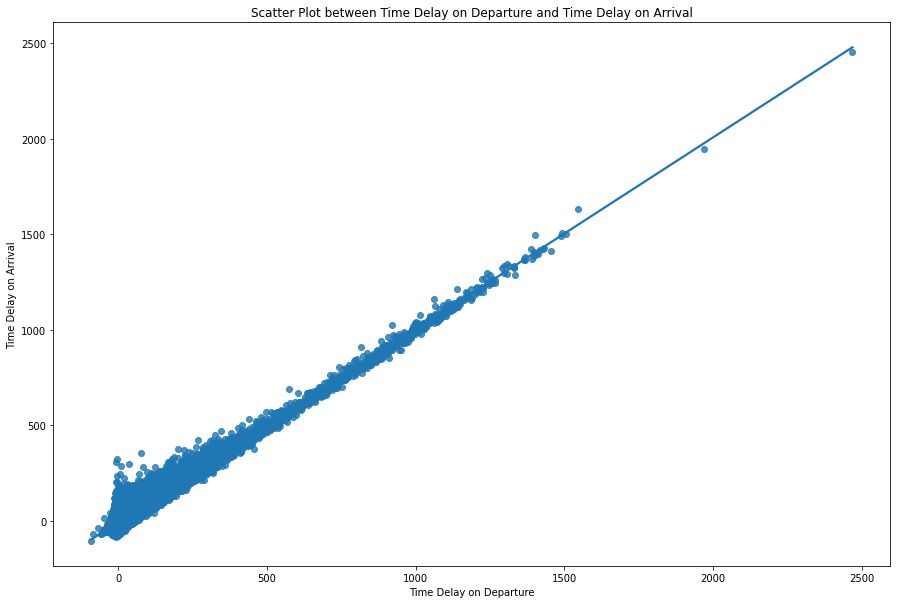

CPU times: user 3min 43s, sys: 5min 50s, total: 9min 34s
Wall time: 4min 47s


In [ ]:
%%time

pyspark_question4 = pyspark_df.limit(1000000)
pyspark_question4 = pyspark_question4.toPandas()

plt.figure(figsize=(15,10))
plt.title("Scatter Plot between Time Delay on Departure and Time Delay on Arrival")
sns.regplot(x=pyspark_question4['DEP_DELAY'], y=pyspark_question4['ARR_DELAY'])
plt.xlabel('Time Delay on Departure')
plt.ylabel('Time Delay on Arrival')
plt.show()

###Library 2: Polars

###Library 3: 

##Question 5: What airlines has the most number in flight delays?

###Library 1: Pyspark

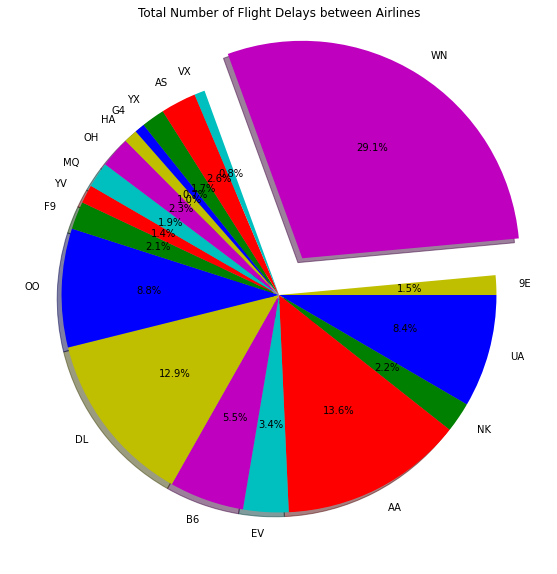

CPU times: user 644 ms, sys: 94.2 ms, total: 738 ms
Wall time: 1min 30s


In [ ]:
%%time

pyspark_question5 = pyspark_df.where(pyspark_df.DEP_DELAY > 0)
pyspark_question5 = pyspark_question5.groupby("OP_CARRIER").count()
pyspark_question5 = pyspark_question5.toPandas()

plt.figure(figsize=(15,10)) 
labels = pyspark_question5['OP_CARRIER']
values = pyspark_question5['count']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0)
plt.pie(values, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Total Number of Flight Delays between Airlines')
plt.show()

###Library 2: Polars

###Library 3: 